## Librerías :

In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import sys
import cv2 as cv
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
%matplotlib inline

## Data Analysis:


In [3]:
classes={0:'Safe Driving'
         ,1:'texting - right'
         ,2:'talking on the phone - right'
         ,3:'texting - left'
         ,4:'talking on the phone - left'
         ,5:'operating the radio'
         ,6:'drinking'
         ,7:'reaching behind'
         ,8:'hair and makeup'
         ,9:'talking to passenger'}

In [17]:
data1 = pd.read_csv('../files/driver_imgs_list.csv')

for j in np.unique(data1["classname"]):
    print "clase :",j,"Numero de ejemplares:",np.count_nonzero(data1["classname"][data1.classname==j])

clase : c0 Numero de ejemplares: 2489
clase : c1 Numero de ejemplares: 2267
clase : c2 Numero de ejemplares: 2317
clase : c3 Numero de ejemplares: 2346
clase : c4 Numero de ejemplares: 2326
clase : c5 Numero de ejemplares: 2312
clase : c6 Numero de ejemplares: 2325
clase : c7 Numero de ejemplares: 2002
clase : c8 Numero de ejemplares: 1911
clase : c9 Numero de ejemplares: 2129


In [104]:
path_test_images='../../datasets/driver-detections/test/'
path_images='../../datasets/driver-detections/train/'
test_images_names=os.listdir(path_test_images)
print("Numero Ejemplares Test:",len(test_images_names))

('Numero Ejemplares Test:', 79726)


In [23]:
data1.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [198]:
imagen=cv.cvtColor(cv.imread(path_test_images+random.choice(test_images_names)), cv.COLOR_BGR2RGB)
print "Las dimensiones de cada imagen son de:",imagen.shape

Las dimensiones de cada imagen son de: (480, 640, 3)


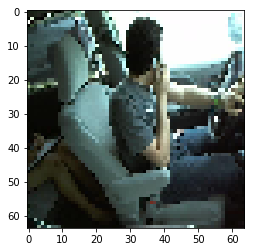

In [199]:
imagen2=cv.resize(imagen,(64,64),interpolation = cv.INTER_CUBIC)
plt.imshow(imagen2)

## Dataset Creation:

In [220]:
#size=100
X_train=[]
y_train=[]
for i in np.unique(data1["classname"]):
    #for j in np.random.choice(data1["img"][data1.classname==i],size):
    for j in data1["img"][data1.classname==i]:
        temp_image=cv.cvtColor(cv.imread(path_images+i+"/"+j), cv.COLOR_BGR2RGB)
        X_train.append(cv.resize(temp_image,(64,64),interpolation = cv.INTER_CUBIC))
        y_train.append(int(i[-1]))
        
c = list(zip(X_train, y_train))

random.shuffle(c)

X_train,y_train = zip(*c)   

X_train=np.array(X_train)
y_train=np.array(y_train)

X_train = X_train.astype('float32')
X_train /= 255

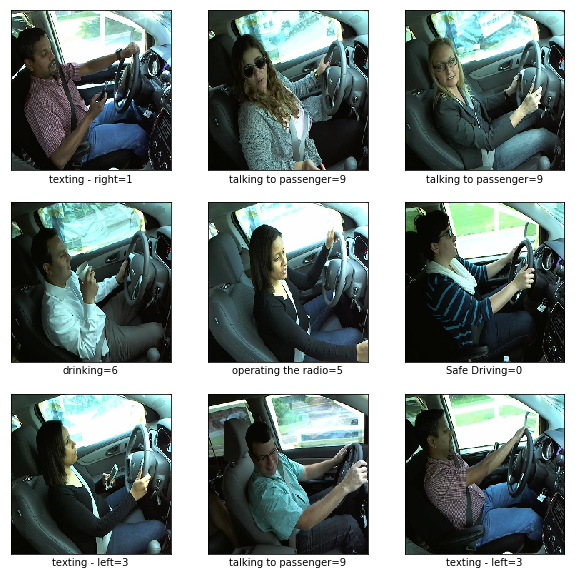

In [172]:

plt.figure(figsize=(10,10))
for i,j in enumerate(np.random.randint(0,500,9)):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[j],cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[j]]+"="+str(y_train[j]))

## Creating Convolutional Neuronal Network

In [225]:
model_CNN =  keras.models.Sequential()
model_CNN.add(keras.layers.Conv2D(20, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid', input_shape=(64, 64, 3)))
model_CNN.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(keras.layers.Conv2D(50, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid'))
model_CNN.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(keras.layers.Flatten())
model_CNN.add(keras.layers.Dense(500, activation='relu', kernel_initializer='he_uniform'))
model_CNN.add(keras.layers.Dense(10, activation='softmax'))

model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 60, 60, 20)        1520      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 30, 30, 20)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 26, 26, 50)        25050     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 13, 13, 50)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 8450)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 500)               4225500   
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5010      
Total para

In [226]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#loss:categorical_crossentropy if we have y with one hot encoding 


In [1]:
history = model_CNN.fit(X_train,y_train, epochs=5, batch_size=60)

NameError: name 'model_CNN' is not defined

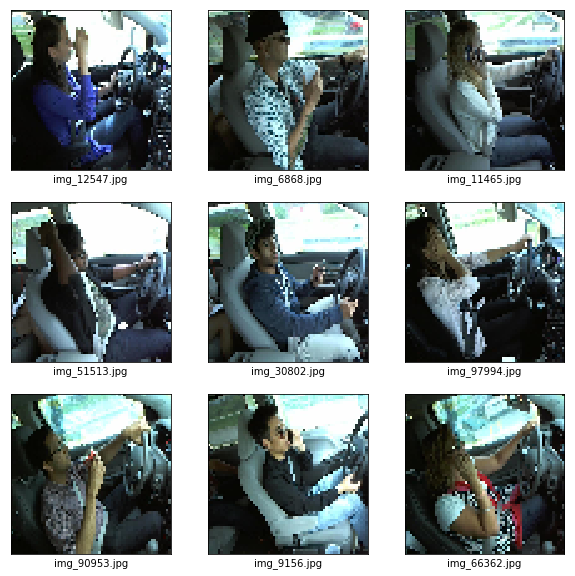

In [218]:
X_test=[]
test_images=np.random.choice(test_images_names,9)
for i in test_images:
    temp_image=cv.cvtColor(cv.imread(path_test_images+i), cv.COLOR_BGR2RGB)
    X_test.append(cv.resize(temp_image,(64,64),interpolation = cv.INTER_CUBIC))
    
X_test=np.array(X_test)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i],cmap=plt.cm.binary)
    plt.xlabel(test_images[i])

valor predicho: 1  clase:  texting - right
max prob:  0.882905


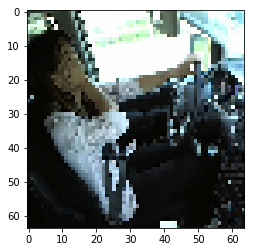

In [219]:
plt.imshow(X_test[5],cmap=plt.cm.binary)

X_test = X_test.astype('float32')
X_test/= 255

prediccion=model_CNN.predict(X_test)
X_test = X_test.astype('uint8')

print "valor predicho:",  np.argmax(prediccion[5]), " clase: ", classes[np.argmax(prediccion[5])]
print "max prob: ", np.max(prediccion[5])